## Graph network - Tissue-specific protein-protein interaction

About the Dataset: This is a collection of physical protein-protein interaction networks for a large number of human tissues. Nodes represent human proteins and edges represent tissue-specific physical interactions between proteins.

Download the PPT-Ohmnet networks available at http://snap.stanford.edu/biodata/datasets/10013/10013-PPT-Ohmnet.html 
(click on the link PPT-Ohmnet_tissues-combined.edgelist.gz to download the data). 

Identify the largest weakly connected component and do the following on the largest connected
component :
1. Compute the degree distribution and display it graphically. Identify the top 5
proteins which interact with most other proteins.
2. Compute Pagerank (Proteinrank) for all nodes and calculate the betweenness
centrality , closeness centrality , eigenvector centrality for nodes that have top 10 page
rank and and that have least 10 page rank and then comment on the values of he
betweenness centrality , closeness centrality , eigenvector centrality.

In [1]:
from pathlib import Path
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import gzip
import operator

#### Loading the data given from .gz file as pandas dataframe

In [2]:
filename = 'PPT-Ohmnet_tissues-combined.edgelist.gz'

with gzip.open(filename) as f:
    proteins = pd.read_csv(f, delimiter='\t')

proteins

,# protein1,protein2,tissue
0,4790,79155,urinary_bladder
1,26039,6597,urinary_bladder
2,57154,3309,urinary_bladder
3,6631,9775,urinary_bladder
4,1855,8312,urinary_bladder
...,...,...,...
3666558,6045,1153,spermatocyte
3666559,10616,1387,spermatocyte
3666560,2033,7026,spermatocyte
3666561,324,1457,spermatocyte


In [68]:
list(proteins.columns)

['# protein1', 'protein2', 'tissue']

In [3]:
G = nx.from_pandas_edgelist(proteins, '# protein1', 'protein2', 'tissue')

In [4]:
G.number_of_nodes()

4510

In [5]:
G.number_of_edges()

70338

In [6]:
list(G.edges(data=True))

[(4790, 79155, {'tissue': 'muscle'}),
 (4790, 5607, {'tissue': 'muscle'}),
 (4790, 8837, {'tissue': 'muscle'}),
 (4790, 4791, {'tissue': 'muscle'}),
 (4790, 801, {'tissue': 'muscle'}),
 (4790, 7528, {'tissue': 'muscle'}),
 (4790, 9252, {'tissue': 'muscle'}),
 (4790, 8841, {'tissue': 'muscle'}),
 (4790, 4089, {'tissue': 'muscle'}),
 (4790, 2734, {'tissue': 'muscle'}),
 (4790, 1191, {'tissue': 'muscle'}),
 (4790, 3064, {'tissue': 'muscle'}),
 (4790, 8451, {'tissue': 'muscle'}),
 (4790, 1499, {'tissue': 'muscle'}),
 (4790, 29110, {'tissue': 'muscle'}),
 (4790, 25855, {'tissue': 'muscle'}),
 (4790, 2317, {'tissue': 'muscle'}),
 (4790, 156, {'tissue': 'muscle'}),
 (4790, 1147, {'tissue': 'muscle'}),
 (4790, 1831, {'tissue': 'muscle'}),
 (4790, 3312, {'tissue': 'muscle'}),
 (4790, 8202, {'tissue': 'muscle'}),
 (4790, 1832, {'tissue': 'muscle'}),
 (4790, 9043, {'tissue': 'muscle'}),
 (4790, 10498, {'tissue': 'muscle'}),
 (4790, 5578, {'tissue': 'muscle'}),
 (4790, 9611, {'tissue': 'muscle'}),

In [8]:
list(nx.connected_components(G))

[{2,
  8200,
  81929,
  8202,
  81930,
  8204,
  14,
  16,
  19,
  20,
  23,
  8218,
  27,
  253980,
  29,
  22801,
  31,
  32,
  34,
  57379,
  37,
  147495,
  41,
  8233,
  43,
  8237,
  8239,
  48,
  50,
  8243,
  204851,
  51,
  54,
  57396,
  58,
  59,
  57402,
  57403,
  57405,
  8260,
  70,
  71,
  8266,
  81,
  8273,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  8289,
  8291,
  100,
  8294,
  8295,
  57447,
  102,
  57448,
  107,
  57449,
  8301,
  114798,
  111,
  114799,
  113,
  131177,
  114803,
  90226,
  114805,
  118,
  119,
  8312,
  8313,
  8314,
  8315,
  123,
  127,
  128,
  8321,
  130,
  131,
  8322,
  8324,
  134,
  135,
  136,
  114822,
  133,
  8323,
  8325,
  142,
  146,
  57491,
  147,
  148,
  150,
  151,
  57496,
  153,
  154,
  155,
  156,
  152,
  158,
  57502,
  57506,
  57508,
  166,
  8359,
  8360,
  8361,
  8362,
  8363,
  8364,
  8365,
  8366,
  8367,
  8368,
  177,
  8370,
  57521,
  57522,
  90293,
  182,
  183,
  176,
  185,
  186,
  181,

In [9]:
set(sorted(d for n, d in G.degree()))

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 126,
 127,
 128,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 151,
 152,
 153,
 154,
 157,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 172,
 174,
 176,
 179,
 180,
 183,
 189,
 190,
 191,
 193,
 194,
 197,
 199,
 201,
 202,
 203,
 205,
 207,
 208,
 209,
 211,
 212

In [10]:
nx.clustering(G)

{4790: 0.13270982826735467,
 79155: 0.2490118577075099,
 26039: 0.12698412698412698,
 6597: 0.1188470066518847,
 57154: 0.0922496857980729,
 3309: 0.11497603316491774,
 6631: 0.3922369765066394,
 9775: 0.2477220182238542,
 1855: 0.15789473684210525,
 8312: 0.1491274457958752,
 5978: 0.10873440285204991,
 10206: 0.19696969696969696,
 396: 0.10599078341013825,
 5604: 0.136986301369863,
 8837: 0.1396854764107308,
 5310: 0.17733990147783252,
 87: 0.10755215985894799,
 56254: 0.12096774193548387,
 51322: 0.12380952380952381,
 11051: 0.25911355887752424,
 3066: 0.11127819548872181,
 1432: 0.0699651018799955,
 8945: 0.07928994082840236,
 7917: 0.032809295967190705,
 84292: 0.23561507936507936,
 5469: 0.21351981351981353,
 10672: 0.07130124777183601,
 7046: 0.08123436196830693,
 26227: 0.17647058823529413,
 2885: 0.041265222993474376,
 23081: 0.4666666666666667,
 3065: 0.07625830959164293,
 5879: 0.04695813092759658,
 4627: 0.10437844661484287,
 27000: 0.3333333333333333,
 9968: 0.221483942414

In [11]:
adj_matrix = nx.adjacency_matrix(G)

print(adj_matrix.todense())

[[1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


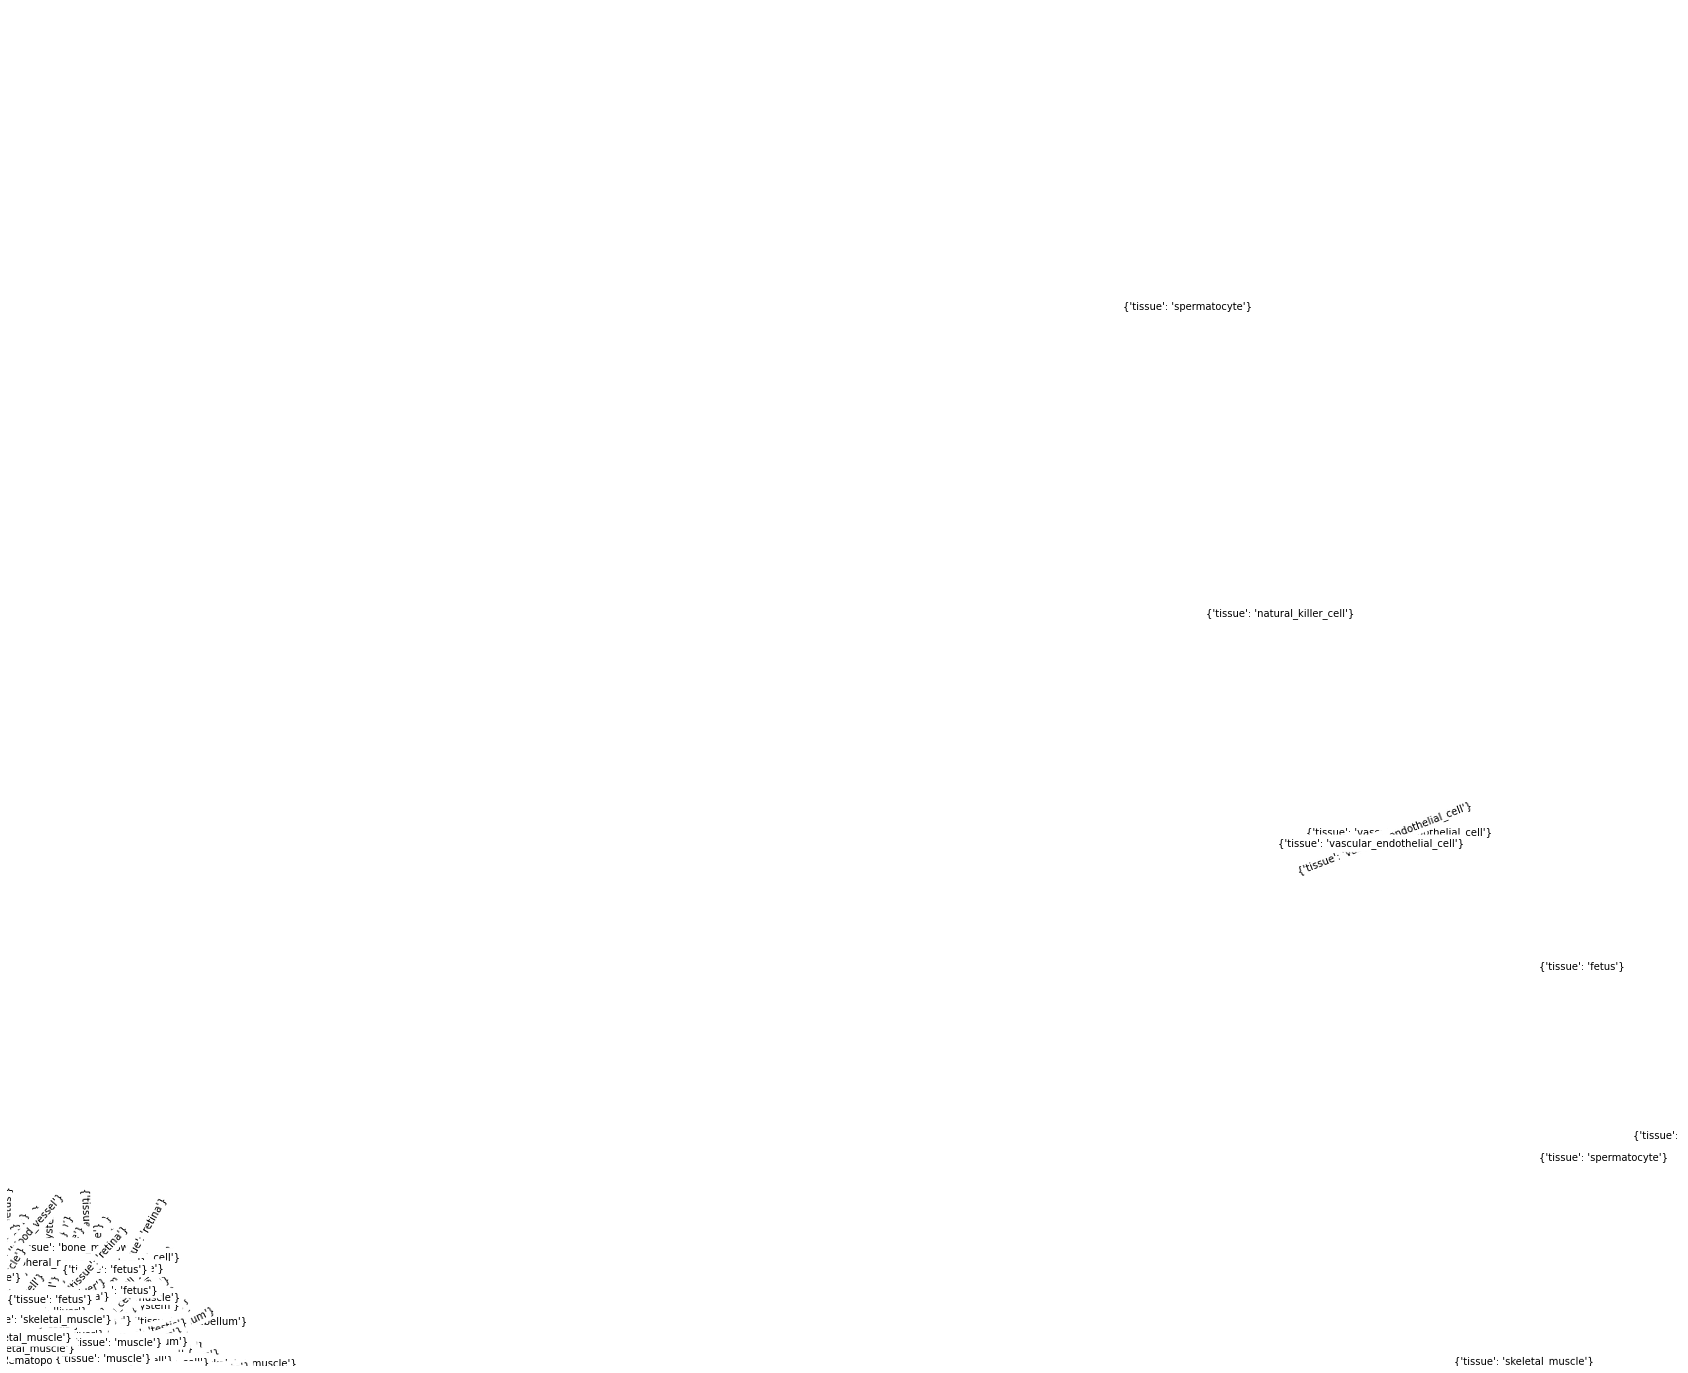

In [15]:
plt.figure(figsize=(30, 25))
# nx.draw_networkx(G, with_labels=True, node_size=200) # arrows=True
# nx.draw(G, pos=nx.spring_layout(G))  # use spring layout
# nx.draw(G, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))
plt.axis('off')
plt.savefig("proteins1.png")
plt.show()

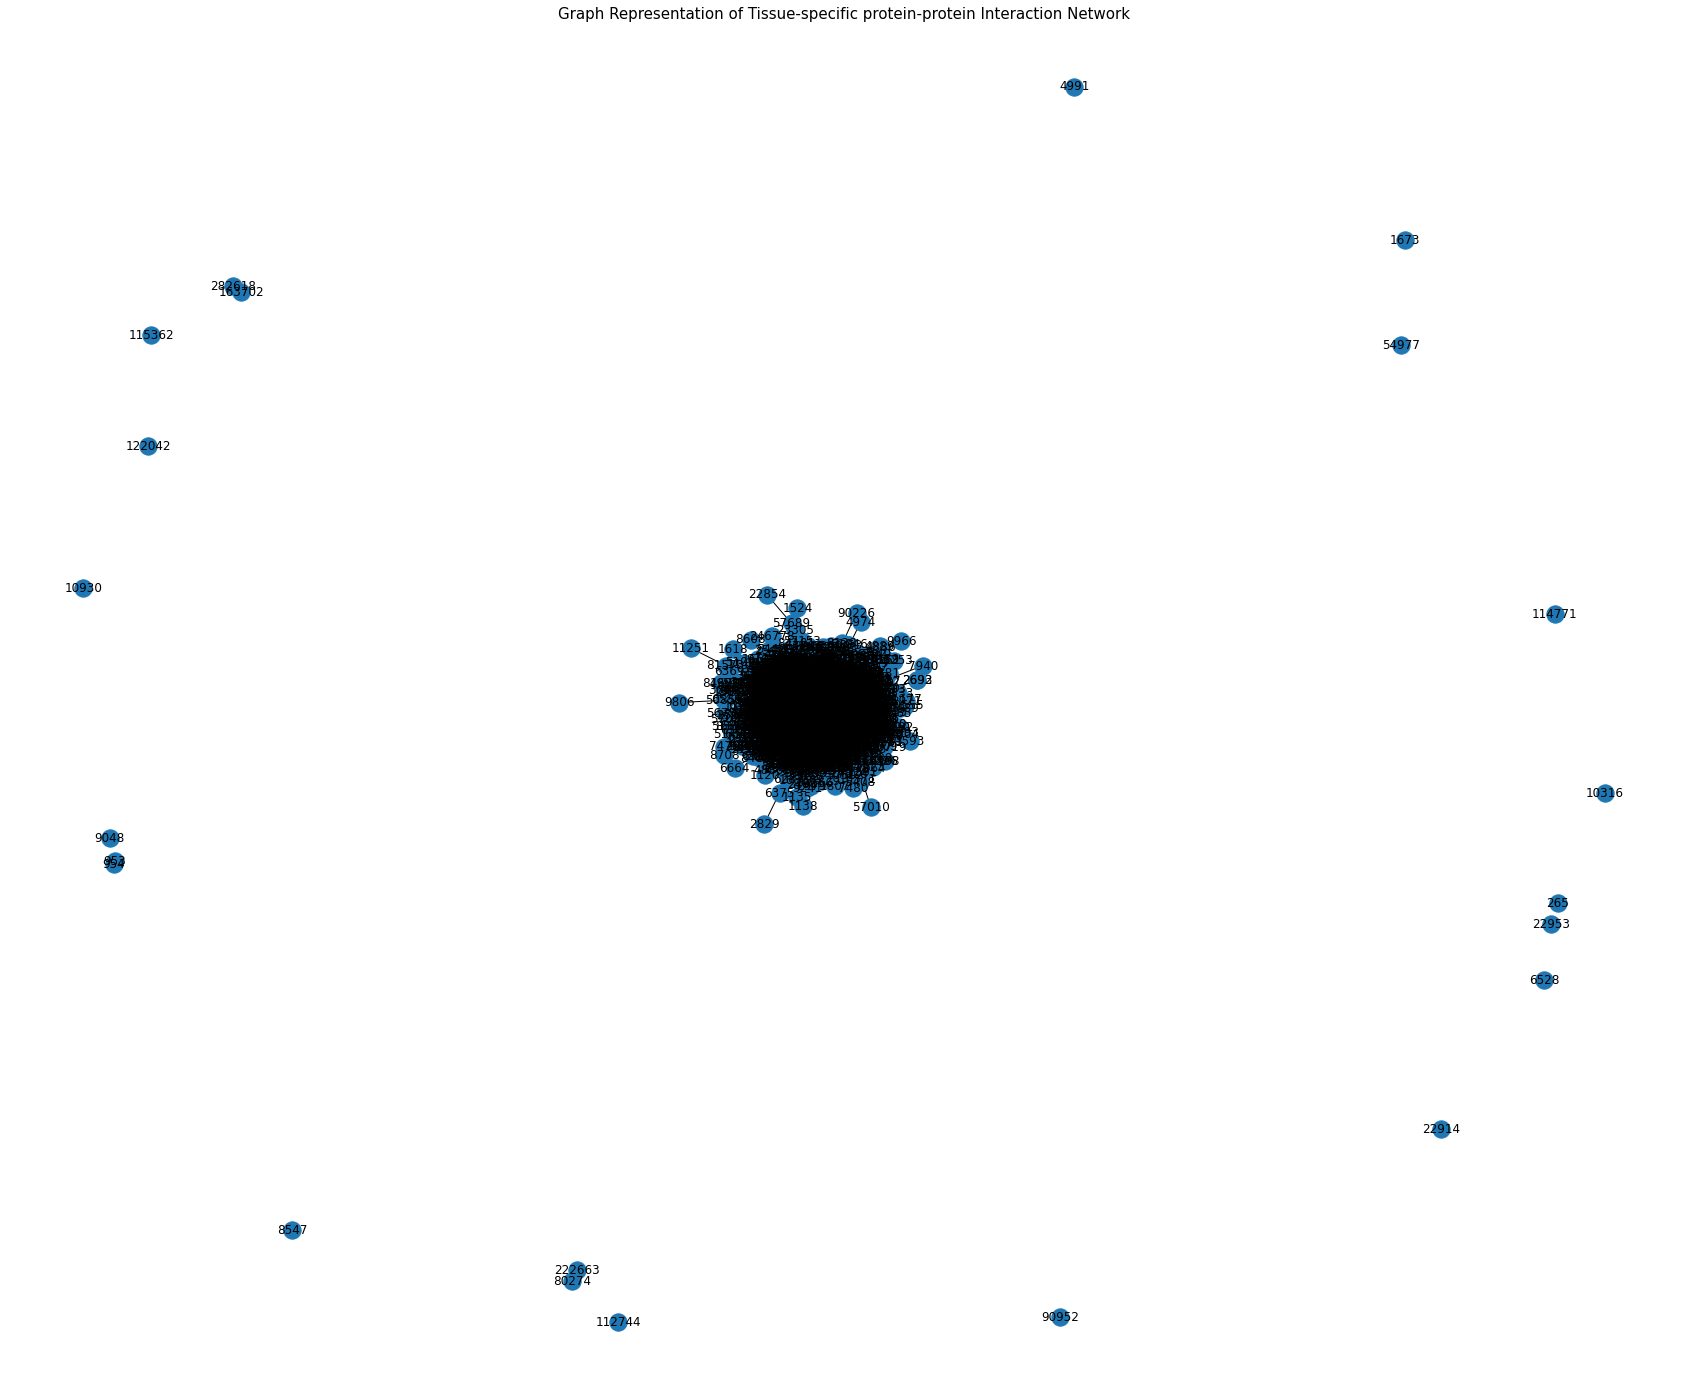

In [12]:
plt.figure(figsize=(350, 360))
nx.draw_networkx(G, with_labels=True)
plt.title('Graph Representation of Tissue-specific protein-protein Interaction Network', size=15)
plt.axis('off')
plt.savefig("proteins2.png")
plt.show()

In [16]:
print(nx.shortest_path(G, 9939, 4223))

[9939, 9775, 4223]


In [17]:
len(list(nx.connected_components(G)))

20

#### Identify the largest weakly connected component

Component size : 4488


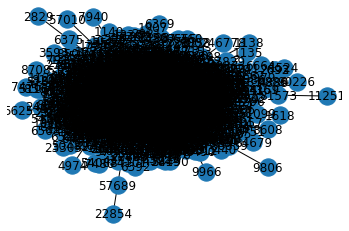

Component size : 1
{10316}
Component size : 1
{9048}
Component size : 2
{282618, 163702}
Component size : 1
{1673}
Component size : 2
{80274, 222663}
Component size : 1
{54977}
Component size : 1
{10930}
Component size : 1
{114771}
Component size : 1
{90952}
Component size : 1
{22953}
Component size : 1
{122042}
Component size : 1
{112744}
Component size : 1
{6528}
Component size : 2
{953, 954}
Component size : 1
{8547}
Component size : 1
{22914}
Component size : 1
{115362}
Component size : 1
{265}
Component size : 1
{4991}


In [36]:
for components in list(nx.connected_components(G)):
    print(f"Component size : {len(components)}")
    if len(components) > 10:
        H = G.subgraph(components)
        nx.draw_networkx(H, with_labels=True)
        plt.axis('off')
        plt.show()
    else:
        print(components)

#### Compute the degree distribution and display it graphically on the largest connected component.

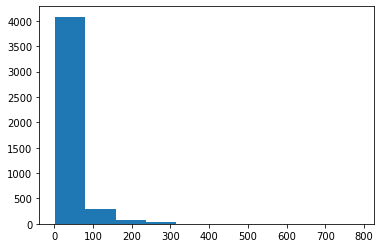

In [35]:
def plot_degree_dist(graph):
    degrees = [graph.degree(n) for n in graph.nodes()]
    plt.hist(degrees)
    plt.show()

    
plot_degree_dist(H)

#### Identify the top 5 proteins which interact with most other proteins on the largest connected component.

In [48]:
sorted(H.degree(), key=lambda item: item[1], reverse=True)[:5]

[(4914, 787), (351, 682), (1994, 623), (7157, 530), (2885, 493)]

#### Compute Pagerank (Proteinrank) for all nodes

In [32]:
protein_rank = nx.pagerank_numpy(H, alpha=0.9)

protein_rank

{4790: 0.0009709315338264395,
 79155: 0.00016117598274809436,
 26039: 0.00020980505638670428,
 6597: 0.0010260603524646587,
 57154: 0.0009727134690705043,
 3309: 0.0015736486596225497,
 6631: 0.0005395959395522058,
 9775: 0.0010028799811680792,
 1855: 0.0002718553517372349,
 8312: 0.0004124859388932642,
 5978: 0.00025823129827896304,
 10206: 0.00010520657849960031,
 396: 0.000437605973232372,
 5604: 0.00048785634714473337,
 8837: 0.0003154778940834233,
 5310: 0.0002133310270622123,
 87: 0.0005471234330739204,
 56254: 0.00022685850588775674,
 51322: 0.00012968507003192152,
 11051: 0.0007431603680243122,
 3066: 0.0013073716696697997,
 1432: 0.0012626414413680947,
 8945: 0.0011153284976076641,
 7917: 0.0009768578458217315,
 84292: 0.0004159045718779349,
 5469: 0.0004289692344321207,
 10672: 0.0002794486682321267,
 7046: 0.0008031069582377099,
 26227: 0.0003271730624467012,
 2885: 0.0033479910281113997,
 23081: 6.585740348365429e-05,
 3065: 0.0020487337496398485,
 5879: 0.00093522371937716

#### Calculate the betweenness centrality , closeness centrality , eigenvector centrality for nodes that have TOP 10 page rank

In [56]:
top10 = dict(sorted(protein_rank.items(), key=operator.itemgetter(1), reverse=True)[:10])    
top10

{351: 0.005351953487783975,
 4914: 0.005084716108173673,
 1994: 0.0046734602543023265,
 7157: 0.003385029756794231,
 2885: 0.0033479910281113997,
 7514: 0.003115808520243938,
 3320: 0.003038444987433584,
 1956: 0.003023870570712892,
 10482: 0.0028515652922004625,
 8452: 0.002686169291581668}

In [59]:
def filter_node(n1):
    return n1 in top10.keys()

subG = nx.subgraph_view(H, filter_node=filter_node)

In [60]:
bw_centrality = nx.betweenness_centrality(subG, normalized=False)

print(bw_centrality)

{2885: 1.45, 7157: 0.45, 8452: 2.783333333333333, 351: 0.25, 3320: 5.416666666666666, 1956: 2.083333333333333, 7514: 2.533333333333333, 1994: 1.5833333333333333, 4914: 1.2, 10482: 0.25}


In [61]:
cls_centrality = nx.closeness_centrality(subG)

print(cls_centrality)

{2885: 0.75, 7157: 0.6428571428571429, 8452: 0.75, 351: 0.6428571428571429, 3320: 0.9, 1956: 0.75, 7514: 0.75, 1994: 0.6923076923076923, 4914: 0.75, 10482: 0.6}


In [62]:
ev_centrality = nx.eigenvector_centrality(subG)

print(ev_centrality)

{2885: 0.35063428104017164, 7157: 0.24166025008298145, 8452: 0.32741683739210997, 351: 0.254226209414636, 3320: 0.4213172454386407, 1956: 0.34398664420179736, 7514: 0.324033627209222, 1994: 0.2826691433586662, 4914: 0.3610888992786365, 10482: 0.18895319918732495}


####  Calculate same for that have LEAST 10 page rank and then comment on the values of their betweenness centrality , closeness centrality , eigenvector centrality.

In [57]:
low10 = dict(sorted(protein_rank.items(), key=operator.itemgetter(1))[:10])    
low10

{90665: 2.7802726571301824e-05,
 22846: 2.785235180650244e-05,
 55604: 2.7866029624502196e-05,
 151887: 2.788759926807703e-05,
 79918: 2.7910143675846067e-05,
 11132: 2.791579605113309e-05,
 7482: 2.7946354943450865e-05,
 3359: 2.7946775103339873e-05,
 3890: 2.799689374057462e-05,
 1002: 2.8025393220826082e-05}

In [63]:
def filter_node(n1):
    return n1 in low10.keys()

subG_low = nx.subgraph_view(H, filter_node=filter_node)

In [64]:
bw_centrality_low = nx.betweenness_centrality(subG_low, normalized=False)

print(bw_centrality_low)

{55604: 0.0, 79918: 0.0, 3359: 0.0, 11132: 0.0, 7482: 0.0, 22846: 0.0, 1002: 0.0, 151887: 0.0, 3890: 0.0, 90665: 0.0}


In [65]:
cls_centrality_low = nx.closeness_centrality(subG_low)

print(cls_centrality_low)

{55604: 0.0, 79918: 0.0, 3359: 0.0, 11132: 0.0, 7482: 0.0, 22846: 0.0, 1002: 0.0, 151887: 0.0, 3890: 0.0, 90665: 0.0}


In [66]:
ev_centrality_low = nx.eigenvector_centrality(subG_low)

print(ev_centrality_low)

{55604: 0.31622776601683794, 79918: 0.31622776601683794, 3359: 0.31622776601683794, 11132: 0.31622776601683794, 7482: 0.31622776601683794, 22846: 0.31622776601683794, 1002: 0.31622776601683794, 151887: 0.31622776601683794, 3890: 0.31622776601683794, 90665: 0.31622776601683794}


### Conclusion:
    
As we can clearly see that the top 10 nodes with highest page-rank have high betweenness_centrality, closeness_centrality & eigenvector_centrality. When the same centrality measures are calculated for the 10 nodes with lowest page-rank, we see zero centrality and lower eigenvector_centrality, which explains their low page-rank scores.

A potential problem with Katz centrality is the following: if a node with high centrality links many others then all those others get high centrality. In many cases, however, it means less if a node is only one among many to be linked. The centrality gained by virtue of receiving a link from an important node should be diluted if the important vertex is very magnanimous with endorsements.

PageRank is an adjustment of Katz centrality that takes into consideration this issue. There are three distinct factors that determine the PageRank of a node: (i) the number of links it receives, (ii) the link propensity of the linkers, and (iii) the centrality of the linkers.
    